In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [4]:
#import the data
HRC = yf.Ticker("HRC+F")

In [5]:
data = yf.download("HRC=F", start="2017-01-01", end="2022-07-28")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [6]:
data.head()

Date
2017-01-03    633.0
2017-01-04    628.0
2017-01-05    625.0
2017-01-06    625.0
2017-01-09    625.0
Name: Adj Close, dtype: float64

In [7]:
data.tail()

Date
2022-07-21    915.0
2022-07-22    923.0
2022-07-25    923.0
2022-07-26    918.0
2022-07-27    850.0
Name: Adj Close, dtype: float64

In [8]:
log_returns = np.log(1 + data.pct_change())

In [9]:
log_returns.tail()

Date
2022-07-21    0.000000
2022-07-22    0.008705
2022-07-25    0.000000
2022-07-26   -0.005432
2022-07-27   -0.076961
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

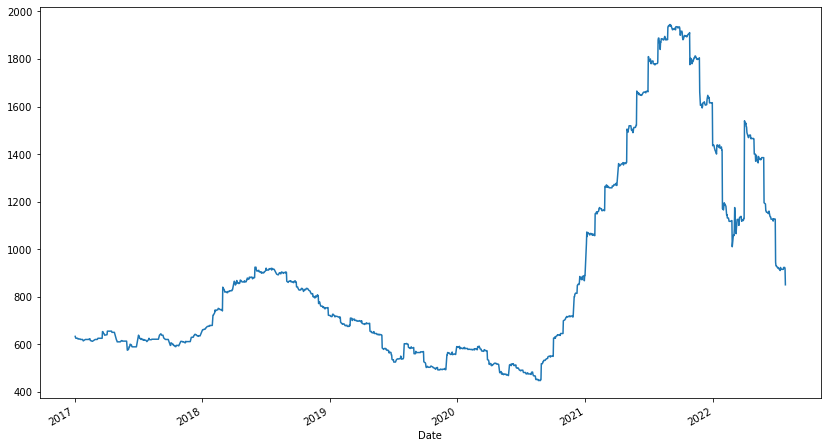

In [10]:
data.plot(figsize=(14,8))

In [11]:
u = log_returns.mean()
u

0.00021834513136310035

In [12]:
var = log_returns.var()
var

0.0003965288010527745

In [13]:
stdev = log_returns.std()
stdev

0.019913030935866455

In [14]:
drift = u - (0.5 * var)
drift

2.00807308367131e-05

In [15]:
np.array(drift)

array(2.00807308e-05)

In [16]:
np.array(stdev)

array(0.01991303)

In [17]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [18]:
x = np.random.rand(10,2)
x

array([[0.42468888, 0.0541211 ],
       [0.18549216, 0.62259512],
       [0.76259265, 0.71444293],
       [0.2531862 , 0.87084051],
       [0.50188984, 0.11849698],
       [0.95845356, 0.98959712],
       [0.34705704, 0.77233044],
       [0.44112202, 0.72990857],
       [0.19178535, 0.76417066],
       [0.75411653, 0.48966455]])

In [19]:
norm.ppf(x)

array([[-0.18991243, -1.6061443 ],
       [-0.89463109,  0.31230365],
       [ 0.71466722,  0.56641141],
       [-0.66449679,  1.13037327],
       [ 0.00473714, -1.18253378],
       [ 1.73301565,  2.31149092],
       [-0.39327811,  0.74654359],
       [-0.1481251 ,  0.6125365 ],
       [-0.87133602,  0.71978291],
       [ 0.6875012 , -0.02591004]])

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.13246809e-02, -3.01738389e-01],
       [ 7.56572673e-02, -8.03372755e-01],
       [-4.67914887e-02,  1.33476100e-01],
       [-9.00128585e-02,  1.50741310e-01],
       [ 5.01811861e-02, -1.50226872e+00],
       [ 2.36296269e+00, -2.45345689e+00],
       [ 2.02113878e-03, -7.81828320e-01],
       [ 1.51584980e+00, -5.22128294e-01],
       [ 1.78600685e+00,  6.33108776e-01],
       [ 1.04457441e+00,  1.32056988e-02]])

In [21]:
t_intervals = 120
interations = 500

In [22]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[0.99079004, 1.02191689, 0.9843735 , ..., 0.96180013, 1.0013915 ,
        0.96125918],
       [0.97563154, 1.00221487, 1.01958379, ..., 0.95968561, 1.01635957,
        1.00454642],
       [1.00695669, 1.02436947, 1.02245619, ..., 1.0065094 , 0.98916015,
        0.94708662],
       ...,
       [0.98740491, 0.99375573, 1.01401668, ..., 0.98220562, 1.00893837,
        1.0248379 ],
       [1.00193383, 0.98577665, 0.99755645, ..., 0.99884176, 1.01258112,
        0.96713491],
       [0.99722028, 1.00748139, 1.03881105, ..., 1.03453211, 0.99796273,
        1.00213881]])

In [23]:
s_zero = data.iloc[-1]
s_zero

850.0

In [24]:
price_list = np.zeros_like(daily_returns)

In [25]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
price_list[0] = s_zero
price_list

array([[850., 850., 850., ..., 850., 850., 850.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [27]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [28]:
price_list

array([[ 850.        ,  850.        ,  850.        , ...,  850.        ,
         850.        ,  850.        ],
       [ 829.2868092 ,  851.88263962,  866.64621805, ...,  815.73277071,
         863.90563057,  853.86445894],
       [ 835.05590405,  872.64256994,  886.10779088, ...,  821.04270185,
         854.5410204 ,  808.68360472],
       ...,
       [ 925.73063151,  692.11001836,  947.46228762, ..., 1088.71157105,
         994.92270379,  657.51184388],
       [ 927.52083915,  682.26589292,  945.14711801, ..., 1087.45057659,
        1007.43994342,  635.90266006],
       [ 924.94258977,  687.37019122,  981.82927027, ..., 1125.00254146,
        1005.38751954,  637.2627352 ]])

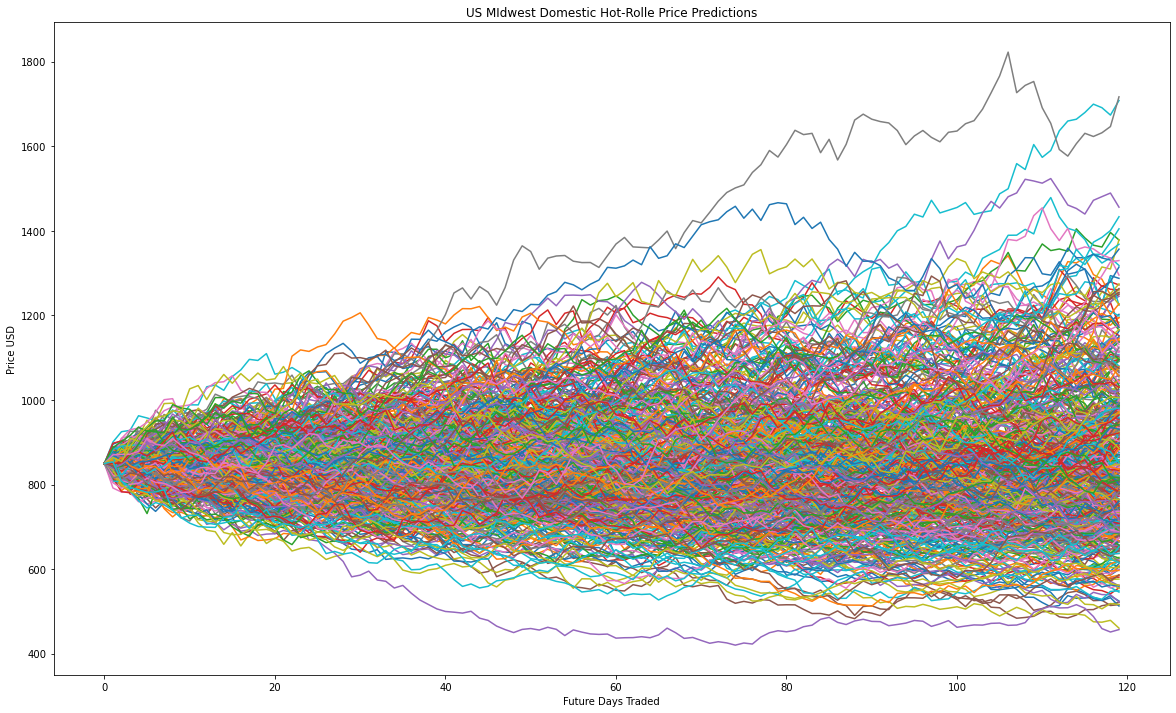

In [29]:
plt.figure(figsize=(20,12))
plt.title('US MIdwest Domestic Hot-Rolle Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)